In [2]:
import numpy as np
import scipy.stats as sps
import matplotlib.pyplot as plt

%matplotlib inline

**Задача 6.** Предлагается изучить некоторые свойства распределения Коши с параметром сдвига $\theta$, обладающего плотностью распределения $p_{\theta}(x) = \frac{1}{\pi (1 + (x- \theta)^2)}$.

*Замечание:* Такое распределение встречается, к примеру, в следующей задаче. На высоте 1 метр от точки $\theta$ находится источник $\gamma$-излучения, 
причем направления траекторий $\gamma$-квантов случайны, т.е. равномерно распределены по полуокружности. Тогда $X_i, i=1,...,n$ — зарегистрированные координаты точек пересечения $\gamma$-квантов с поверхностью детекторной плоскости — образуют выборку из распределения Коши со сдвигом $\theta$.

**1.** На отрезке $[-7, 7]$ постройте плотность стандартного нормального распределения и стандартного распределения Коши. Не забудьте добавить легенду.

**Решение:**

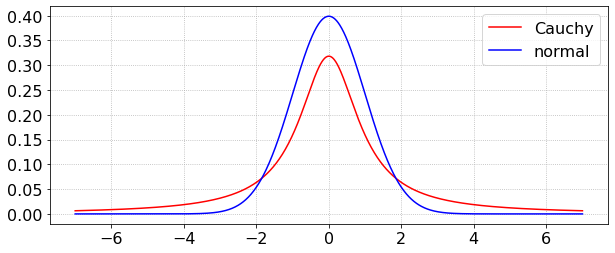

In [3]:
grid = np.linspace(-7, 7, 1000)

plt.figure(figsize=(10, 4))
plt.plot(grid, sps.cauchy.pdf(grid), color='red', label='Cauchy')
plt.plot(grid, sps.norm.pdf(grid), color='blue', label='normal')
plt.legend(fontsize=16)
plt.grid(ls=':')
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.show()

**Вывод:** Распределение Коши обладает более тяжелыми хвостами, нежели нормальное.

**2.** **2.** Сгенерируйте выборку $X = \left(X_1, \dots, X_{1000} \right)$ из стандартного распределения Коши ($\theta = 0$). Для всех $n \leqslant 1000$ по первым $n$ элементам выборки $X_1, \dots, X_n$ вычислите значения следующих оценок:
- $\overline{X}$  —  выборочное среднее;
- $\widehat{\mu}$ —  выборочная медиана;
- Oдношаговая оценка, построенная по выборочной медиане (см. лекцию 4). 

В случае выборочной медианы можно использовать цикл по подвыборкам.

На одном графике изобразите зависимость значений этих оценок от $n$.
Сравните асимптотические дисперсии оценок (для тех оценок, для которых они существуют). Сделайте вывод.

**Замечание:** если некоторые оценки имеют большой разброс, и разница между графиками зависимостей оценок с малыми значениями недостаточно заметна, стоит сделать два графика, на одном из которых будут изображены все оценки, а на втором &mdash; только достаточно хорошие (мало отличающиеся от оцениваемого параметра), то есть этот график будует иметь меньший масштаб по оси $y$.





**Решение:**

*Напоминание: если $\widehat{\theta}_0$ — асимптотически нормальная оценка, то одношаговая оценка $\widehat{\theta}_1$ вычисляется как $\widehat{\theta}_1 = \widehat{\theta}_0 - \left(l''_X(\widehat{\theta}_0) \right)^{-1} l'_X(\widehat{\theta}_0)$, где $l_X(\theta)$ — логарифмическая функция правдоподобия.*


*Выкладки для вычисления одношаговых оценок:*

$\ln p_\theta (X_i) = \ln  \frac{1}{\pi (1 + (X_i- \theta)^2)} = - \ln \pi - \ln (1 + (X_i- \theta)^2)$.

$l_X(\theta) = \sum\limits^{n}_{i=1} \left( - \ln \pi - \ln (1 + (X_i- \theta)^2) \right) = - n  \ln \pi - \sum\limits^{n}_{i=1} \ln (1 + (X_i- \theta)^2)$.

$l'_X(\theta) = 2 \sum\limits^n_{i=1} \frac{X_i - \theta}{1 + (X_i - \theta)^2}$.

$l''_X(\theta) = - 2 \sum\limits^n_{i=1} \frac{1 - (X_i - \theta)^2}{(1 + (X_i - \theta)^2)^2}$.

Тогда  $\widehat{\theta}_1 = \widehat{\theta}_0 + \frac{\sum\limits_{i=1}^n \frac{X_i - \widehat{\theta}_0}{1 + (X_i - \widehat{\theta}_0)^2}}{\sum\limits_{i=1}^n \frac{1 - (X_i - \widehat{\theta}_0)^2}{(1 + (X_i - \widehat{\theta}_0)^2)^2}}$

*На лекции 5 помимо общей формулы выше давалась и конкретная формула для одношаговой оценки, построенной по медиане, которая получается из формулы выше прямым подставление медианы вместо $\widehat \theta_0$:*


$\widehat{\theta}_1 = \widehat{\mu} + \frac{\sum\limits_{i=1}^n \frac{X_i - \widehat{\mu}}{1 + (X_i - \widehat{\mu})^2}}{\sum\limits_{i=1}^n \frac{1 - (X_i - \widehat{\mu})^2}{(1 + (X_i - \widehat{\mu})^2)^2}}$

Асимптотическая дисперсия этой оценки равна 2.

Вычисление одношаговой оценки $\widehat\theta_1$ параметра сдвига распределения Коши:

In [6]:
def cauchy_one_step_estimation(sample, init_estimation):
    """Вычисляет одношаговую оценку параметра сдвига распределения Коши.
    
    Аргументы:
        sample -- numpy-массив вещественных чисел; выборка, по которой
            вычисляется одношаговая оценка.
        init_estimation -- вещественное число; асимптотически нормальная оценка,
            по которой вычисляется одношаговая.
    """
    
    sample_centered = sample - init_estimation
    first_derivative = 2 * np.sum(sample_centered / (1 + sample_centered ** 2))
    second_derivative = -2 * np.sum((1 - sample_centered ** 2) / \
                                    (1 + sample_centered ** 2) ** 2)
    return init_estimation - first_derivative / second_derivative

Генерация выборки, вычисление оценок:

In [7]:
%%time
size = 1000
time = np.arange(1, size + 1)
sample = sps.cauchy.rvs(size=size)

avg_estimation = np.cumsum(sample) / time
med_estimation = np.array([np.median(sample[:n]) for n in time])

onestep_med_estimation = np.array([cauchy_one_step_estimation(
        sample[:n], med_estimation[n-1]) for n in time])


CPU times: user 82.4 ms, sys: 857 µs, total: 83.2 ms
Wall time: 86 ms


Построение графиков:

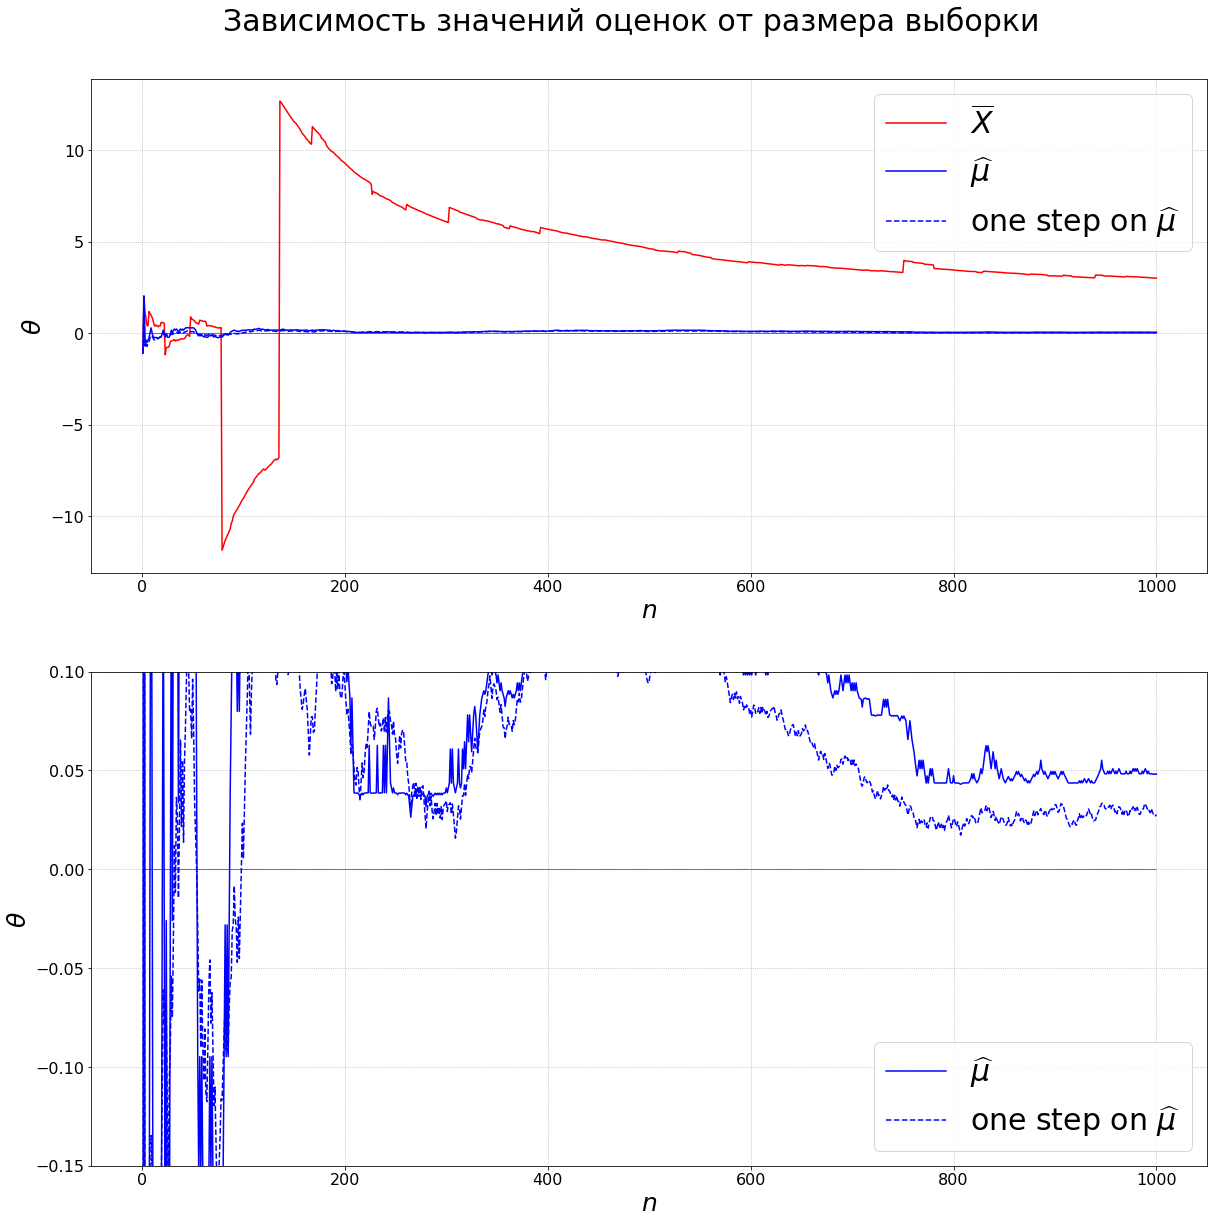

In [8]:
plt.figure(figsize=(20, 20))

for i, ylim in zip([1, 2], [None, (-0.15, 0.1)]):
    plt.subplot(2, 1, i)
    
    if i == 1:
        plt.plot(time, avg_estimation, color='red',
                 label='$\overline{X}$')
        
    plt.plot(time, med_estimation, color='blue',
             label='$\widehat{\mu}$')
    plt.plot(time, onestep_med_estimation, color='blue',
             ls='--', label='one step on $\widehat{\mu}$')
    
    plt.xlabel('$n$', fontsize=25)
    plt.ylabel('$\\theta$', fontsize=25)
    
    plt.hlines(0, 0, size, color='black', lw=0.5)
    plt.legend(fontsize=30)
    plt.grid(ls=':')
    plt.xticks(fontsize=16)
    plt.yticks(fontsize=16)
    plt.ylim(ylim)

plt.suptitle('Зависимость значений оценок от размера выборки',
             fontsize=30, y=0.93)

plt.show()

**Вывод:**

Среднее $\overline{X}$ выборки $X_1, \dots, X_n$ из распределения Коши имеет такое же распределение, что и один элемент выборки, поэтому оно не является оценкой параметра сдвига лучше, чем единственный элемент выборки. 

Асимптотическая дисперсия выборочной медианы: $\frac{\pi^2}{4} \approx 2.47$.

Асимптотическая дисперсия одношаговых оценок, полученной по асимптотически нормальным оценкам: $1 / i(\theta) = 2$ &mdash; совпадает с ОМП.

Согласно теории, при бесконечном повторении эксперимента одношаговая оценка в среднем должна меньше отклоняться от нуля, чем медиана; это следует из соотношения значений их асимптотических дисперсий.

На графике можно увидеть, что одношаговая оценка чуть лучше медианы. Тем не менее, обе оценки являются асимптотически нормальными, и потому состоятельными, что иллюстрирует график.